In [1]:
import pandas as pd

# Original Dataset

In [2]:
# Import netflix data
"""
Kaggle link: https://www.kaggle.com/datasets/shivamb/netflix-shows

Dataset:
show_id (text_format): Unique ID for every Movie / Tv Show
type (text_format): Identifier - A Movie or TV Show
title (text_format): Title of the Movie / Tv Show
director (text_format): Director of the Movie
cast (text_format): Actors involved in the movie / show
country (calendar_today): Country where the movie / show was produced
date_added (grid_3x3): Date it was added on Netflix
release_year (text_format): Actual Release year of the move / show
rating (text_format): TV Rating of the movie / show
duration (text_format): Total Duration - in minutes or number of seasons
listed_in (text_format): Genere
description (text_format): The summary description
"""
netflix_data = pd.read_csv('datasets/netflix.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Null:  0


<AxesSubplot:>

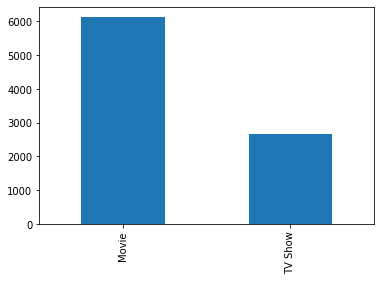

In [3]:
# We may get just one type
print("Null: ", netflix_data.type.isna().sum())
netflix_data.type.value_counts().plot.bar()

In [4]:
print("Null: ", netflix_data.director.isna().sum())
netflix_data.director.value_counts()

Null:  2634


Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
                          ..
Houda Benyamina            1
Fernando Lebrija           1
Chi Keung Fung             1
Storm Theunissen           1
Raymond Wood               1
Name: director, Length: 4528, dtype: int64

In [5]:
# We should separate the list
print("Null: ", netflix_data.cast.isna().sum())
netflix_data.cast.value_counts()

Null:  825


David Attenborough                                                                                                                                                                                 19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                            14
Samuel West                                                                                                                                                                                        10
Jeff Dunham                                                                                                                                                                                         7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                                              6
          

In [6]:
# Country is very unbalanced, maybe group by US, NOT_US
print("Null: ", netflix_data.country.isna().sum())
netflix_data.country.value_counts().head(20)

Null:  831


United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: country, dtype: int64

In [7]:
# Maybe get just the year
print("Null: ", netflix_data.date_added.isna().sum())
netflix_data.date_added.value_counts()

Null:  10


January 1, 2020       109
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
December 31, 2015       1
October 2, 2017         1
September 15, 2015      1
April 14, 2018          1
May 13, 2019            1
Name: date_added, Length: 1767, dtype: int64

In [9]:
# We should group it somehow, maybe by decade, groups of 5 years or just 2000-
print("Null: ", netflix_data.release_year.isna().sum())
netflix_data.release_year.value_counts()

Null:  0


2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [10]:
# What is it?
print("Null: ", netflix_data.rating.isna().sum())
netflix_data.rating.value_counts()

Null:  4


TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64

In [11]:
# Group by range of minutes for movies, and 1 season or 2+ seasons for TV Shows
print("Null: ", netflix_data.duration.isna().sum())
netflix_data.duration.value_counts()

Null:  3


1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
178 min         1
312 min         1
5 min           1
208 min         1
205 min         1
Name: duration, Length: 220, dtype: int64

In [12]:
# We should separate the list
print("Null: ", netflix_data.listed_in.isna().sum())
netflix_data.listed_in.value_counts()

Null:  0


Dramas, International Movies                                              362
Documentaries                                                             359
Stand-Up Comedy                                                           334
Comedies, Dramas, International Movies                                    274
Dramas, Independent Movies, International Movies                          252
                                                                         ... 
Classic & Cult TV, TV Horror, TV Mysteries                                  1
Cult Movies, Dramas, Music & Musicals                                       1
Comedies, Documentaries, International Movies                               1
Comedies, Romantic Movies, Sports Movies                                    1
British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 514, dtype: int64

In [13]:
# Bag of words?
print("Null: ", netflix_data.description.isna().sum())
netflix_data.description.value_counts()

Null:  0


Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests there’s more to the mystery than meets the eye.     2
                                                                                                                                                            ..
After the world learns the truth about her fai

## GRAPH

'show' = 'show_id', 'title'

'show' -> typed as -> 'type'

'show' -> categorized as -> 'listed_in'

'show' -> directed by -> 'director' 

'show' -> released on -> 'release_year'

'show' -> lasts for -> 'duration'

'show' -> produced in -> 'country' 

'show' -> interpreted by -> 'cast'

-- 'show' -> add on netflix on -> 'date_added'

-- 'show' -> rated as -> 'rating'

-- 'show' -> described as -> 'description'

In [47]:
# Converting strings to ints so we can use the algorithm.
def transform_categories_in_indexes(dataset):
    list_cols = dataset.columns
    next_index = 0
    for col in list_cols:
        categories = dataset.loc[:, col].unique()
        indexes = range(next_index, next_index+len(categories))
        dict_categories = dict(zip(categories, indexes))
        dataset.update(dataset.loc[:, col].replace(dict_categories))
        next_index = indexes[-1] + 1
    return dataset

In [48]:
def create_type_file(dataset, file_name, debug=True):
    with open(f'{file_name}.type','w') as file:
        list_cols = dataset.columns
        for i in range(len(list_cols)):
            n_rows = dataset[list_cols[i]].nunique()
            if debug:
                print(list_cols[i], ":", n_rows, "vertices")
            for j in range(n_rows):
                file.write(str(i))
                file.write('\n')

In [49]:
# This method only works if only column 0 has connections with other layers
def create_ncol_file_only_column_0(dataset, file_name):
    with open(f'{file_name}.ncol','w') as file:
        base_column = 'show_id'
        # for each column that is not show_id, there is a connection with show_id
        list_cols = dataset.columns
        for col in list_cols[1:]:
            df = dataset[[base_column, col]].drop_duplicates()
            # for each row
            for index, row in df.iterrows():
                file.write(f"{row[base_column]} {row[col]} 1")
                file.write('\n')

In [66]:
# This method works if any column has connections with any other layers
def create_ncol_file(dataset, file_name):
    with open(f'{file_name}.ncol','w') as file:
        list_cols = dataset.columns
        for i in range(len(list_cols)):
            for j in range(i+1,len(list_cols)):
                df = dataset[[list_cols[i], list_cols[j]]].drop_duplicates()
                # for each row
                for index, row in df.iterrows():
                    file.write(f"{row[list_cols[i]]} {row[list_cols[j]]} 1")
                    file.write('\n')

In [50]:
# This method only works for bipartite networks that is straightfoward the classification
def create_Cbipartite_membership_file(dataset, file_name):
    with open(f'{file_name}.membership','w') as file:
        other_column = dataset.columns[1]
        ## Layer 0 - show_id
        n_shows = dataset.shape[0]
        for index, row in dataset.iterrows():
            file.write(f"{row[other_column]-n_shows}")
            file.write('\n')

        ## Layer 1 - only works if there is no communities there
        for i in range (dataset[other_column].nunique()):
            file.write(str(i))
            file.write('\n')

In [64]:
def generate_all_files(dataset, filename, only_connect_column0=False, has_only_two_layers=False):
    df_transformed = transform_categories_in_indexes(dataset)
    create_type_file(df_transformed, file_name=filename)
    if only_connect_column0:
        create_ncol_file_only_column_0(df_transformed, file_name=filename)
    else:
        create_ncol_file(df_transformed, file_name=filename)
    
    if has_only_two_layers:
        create_Cbipartite_membership_file(df_transformed, file_name=filename)

# Bipartite network

## movie, type
it should be straightforward 2 communities -> it works 100%, correct answers [in both determining 2 communities and letting it open]. 

Modularity of both original and detected is low = 0.269. What is the correct way to calculate that? Or to evaluate a real world network in which we don't know either how many and which are the communities.

In [131]:
bipartite1 = netflix_data[['show_id', 'type']]
bipartite1.head()

,show_id,type
0,s1,Movie
1,s2,TV Show
2,s3,TV Show
3,s4,TV Show
4,s5,TV Show


In [65]:
filename = 'g_bipartite-1'
filepath = f'../outputs/output_bnoc/{filename}/{filename}'
generate_all_files(bipartite1, filepath, has_only_two_layers=True)

/usr/local/Cellar/jupyterlab/2.2.9/libexec/lib/python3.9/site-packages/pandas/core/frame.py:6599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


show_id : 8807  vertices
type : 2  vertices


## SMALL: movie, type

In [135]:
small_bipartite1 = netflix_data[['show_id', 'type']]
small_bipartite1 = small_bipartite1.sample(5, random_state=0).reset_index(drop=True)
small_bipartite1

,show_id,type
0,s274,TV Show
1,s2039,Movie
2,s463,Movie
3,s8688,Movie
4,s4106,TV Show


In [137]:
filename = 'g_small_bipartite-1'
filepath = f'../outputs/output_bnoc/{filename}/{filename}'
generate_all_files(small_bipartite1, filepath, has_only_two_layers=True)

show_id : 5 vertices
type : 2 vertices


# Tripartite network

## only movies: show_id, release_year, listed_in

In [92]:
tripartite1 = netflix_data[netflix_data.type=='Movie'][['show_id', 'release_year', 'listed_in']]
tripartite1.head(10)

,show_id,release_year,listed_in
0,s1,2020,Documentaries
6,s7,2021,Children & Family Movies
7,s8,1993,"Dramas, Independent Movies, International Movies"
9,s10,2021,"Comedies, Dramas"
12,s13,2021,"Dramas, International Movies"
13,s14,2021,"Children & Family Movies, Comedies"
16,s17,2020,"Documentaries, International Movies"
18,s19,2021,Thrillers
22,s23,1996,"Comedies, International Movies"
23,s24,2021,Children & Family Movies


In [93]:
# Group release_year by decade
tripartite1.release_year = tripartite1.release_year.apply(lambda x: (x//10)*10)

# Split listed_in 
tripartite1 = (tripartite1
               .set_index(['show_id', 'release_year'])['listed_in']
               .apply(lambda x: [s.strip() for s in x.split(',')])
               .apply(pd.Series)
               .stack()
              )
tripartite1 = tripartite1.reset_index()
tripartite1.columns = ['show_id', 'release_decade', 'sample_num', 'category']
tripartite1 = tripartite1[['show_id', 'release_decade', 'category']]
tripartite1.head(10)

,show_id,release_decade,category
0,s1,2020,Documentaries
1,s7,2020,Children & Family Movies
2,s8,1990,Dramas
3,s8,1990,Independent Movies
4,s8,1990,International Movies
5,s10,2020,Comedies
6,s10,2020,Dramas
7,s13,2020,Dramas
8,s13,2020,International Movies
9,s14,2020,Children & Family Movies


In [95]:
# Still unbalanced by let's proceed
tripartite1.release_decade.value_counts()

2010    8895
2020    1669
2000    1523
1990     518
1980     293
1970     174
1960      64
1950      30
1940      24
Name: release_decade, dtype: int64

In [96]:
filename = 'g_tripartite-1'
filepath = f'../outputs/output_bnoc/{filename}/{filename}'
generate_all_files(tripartite1, filepath)

show_id : 6131 vertices
release_decade : 9 vertices
category : 20 vertices


In [97]:
tripartite1.head(10)

,show_id,release_decade,category
0,0,6131,6140
1,1,6131,6141
2,2,6132,6142
3,2,6132,6143
4,2,6132,6144
5,3,6131,6145
6,3,6131,6142
7,4,6131,6142
8,4,6131,6144
9,5,6131,6141


## SMALL only movies: show_id, release_year, listed_in

In [127]:
small_tripartite1 = netflix_data[netflix_data.type=='Movie'][['show_id', 'release_year', 'listed_in']]
small_tripartite1 = small_tripartite1.sample(10, random_state=0).reset_index(drop=True)
small_tripartite1

,show_id,release_year,listed_in
0,s7631,2013,"Dramas, Independent Movies, International Movies"
1,s4987,2017,"Dramas, International Movies"
2,s8359,2014,"International Movies, Sci-Fi & Fantasy, Thrillers"
3,s8453,2004,"Dramas, Music & Musicals, Romantic Movies"
4,s4171,2019,"Action & Adventure, International Movies"
5,s5653,2016,"Dramas, Independent Movies, International Movies"
6,s2678,2016,Comedies
7,s8657,2017,Documentaries
8,s8753,2019,"Children & Family Movies, Dramas"
9,s2349,2017,"Comedies, International Movies, Romantic Movies"


In [128]:
# Split listed_in 
small_tripartite1 = (small_tripartite1
               .set_index(['show_id', 'release_year'])['listed_in']
               .apply(lambda x: [s.strip() for s in x.split(',')])
               .apply(pd.Series)
               .stack()
              )
small_tripartite1 = small_tripartite1.reset_index()
small_tripartite1.columns = ['show_id', 'release_year', 'sample_num', 'category']
small_tripartite1 = small_tripartite1[['show_id', 'release_year', 'category']]
small_tripartite1

,show_id,release_year,category
0,s7631,2013,Dramas
1,s7631,2013,Independent Movies
2,s7631,2013,International Movies
3,s4987,2017,Dramas
4,s4987,2017,International Movies
5,s8359,2014,International Movies
6,s8359,2014,Sci-Fi & Fantasy
7,s8359,2014,Thrillers
8,s8453,2004,Dramas
9,s8453,2004,Music & Musicals


In [130]:
filename = 'g_small_tripartite-1'
filepath = f'../outputs/output_bnoc/{filename}/{filename}'
generate_all_files(small_tripartite1, filepath)

show_id : 10 vertices
release_year : 6 vertices
category : 11 vertices


## 4-partite

In [3]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [184]:
small_4partite1 = netflix_data[netflix_data.type=='Movie'][['show_id', 'director', 'cast', 'listed_in']]
small_4partite1 = small_4partite1.dropna()
small_4partite1

,show_id,director,cast,listed_in
6,s7,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Children & Family Movies
7,s8,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Dramas, Independent Movies, International Movies"
9,s10,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","Comedies, Dramas"
12,s13,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Dramas, International Movies"
13,s14,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...","Children & Family Movies, Comedies"
...,...,...,...,...
8801,s8802,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","Dramas, International Movies, Thrillers"
8802,s8803,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","Cult Movies, Dramas, Thrillers"
8804,s8805,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Comedies, Horror Movies"
8805,s8806,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies"


In [185]:
# Split director 
small_4partite1 = (small_4partite1
               .set_index(['show_id', 'cast', 'listed_in'])['director']
               .apply(lambda x: [s.strip() for s in x.split(',')])
               .apply(pd.Series)
               .stack()
              )
small_4partite1 = small_4partite1.reset_index()
small_4partite1.columns = ['show_id', 'cast', 'listed_in', 'sample_num', 'director']
small_4partite1 = small_4partite1.drop(['sample_num'], axis=1)

# Split listed_in 
small_4partite1 = (small_4partite1
               .set_index(['show_id', 'director', 'cast'])['listed_in']
               .apply(lambda x: [s.strip() for s in x.split(',')])
               .apply(pd.Series)
               .stack()
              )
small_4partite1 = small_4partite1.reset_index()
small_4partite1.columns = ['show_id', 'director', 'cast', 'sample_num', 'category']
small_4partite1 = small_4partite1.drop(['sample_num'], axis=1)

# Split cast 
small_4partite1 = (small_4partite1
               .set_index(['show_id', 'director', 'category'])['cast']
               .apply(lambda x: [s.strip() for s in x.split(',')])
               .apply(pd.Series)
               .stack()
              )
small_4partite1 = small_4partite1.reset_index()
small_4partite1.columns = ['show_id', 'director', 'category', 'sample_num', 'cast']
small_4partite1 = small_4partite1.drop(['sample_num'], axis=1)
small_4partite1

,show_id,director,category,cast
0,s7,Robert Cullen,Children & Family Movies,Vanessa Hudgens
1,s7,Robert Cullen,Children & Family Movies,Kimiko Glenn
2,s7,Robert Cullen,Children & Family Movies,James Marsden
3,s7,Robert Cullen,Children & Family Movies,Sofia Carson
4,s7,Robert Cullen,Children & Family Movies,Liza Koshy
...,...,...,...,...
109883,s8807,Mozez Singh,Music & Musicals,Manish Chaudhary
109884,s8807,Mozez Singh,Music & Musicals,Meghna Malik
109885,s8807,Mozez Singh,Music & Musicals,Malkeet Rauni
109886,s8807,Mozez Singh,Music & Musicals,Anita Shabdish


In [186]:
df_cast = small_4partite1[['show_id', 'cast']].drop_duplicates().cast.value_counts().reset_index()
df_cast.columns = ['cast', 'times']
df_cast = df_cast[df_cast.times > 2]
df_cast = df_cast[['cast']]
df_cast

,cast
0,Anupam Kher
1,Shah Rukh Khan
2,Naseeruddin Shah
3,Om Puri
4,Akshay Kumar
...,...
3652,Terrence Scammell
3653,David Schaal
3654,Jhansi
3655,Dana Gourrier


In [187]:
df_cast_ids = small_4partite1.merge(df_cast, how='inner', on='cast')['show_id'].drop_duplicates()
df_cast_ids

0           s7
2        s1453
4        s1665
5        s1682
8        s3249
         ...  
44951    s8328
44953    s8329
44955    s8330
45009    s8779
45012    s8780
Name: show_id, Length: 4407, dtype: object

In [188]:
small_4partite1

,show_id,director,category,cast
0,s7,Robert Cullen,Children & Family Movies,Vanessa Hudgens
1,s7,Robert Cullen,Children & Family Movies,Kimiko Glenn
2,s7,Robert Cullen,Children & Family Movies,James Marsden
3,s7,Robert Cullen,Children & Family Movies,Sofia Carson
4,s7,Robert Cullen,Children & Family Movies,Liza Koshy
...,...,...,...,...
109883,s8807,Mozez Singh,Music & Musicals,Manish Chaudhary
109884,s8807,Mozez Singh,Music & Musicals,Meghna Malik
109885,s8807,Mozez Singh,Music & Musicals,Malkeet Rauni
109886,s8807,Mozez Singh,Music & Musicals,Anita Shabdish


In [189]:
small_4partite1 = small_4partite1.merge(df_cast_ids, how='inner', on='show_id')
small_4partite1

,show_id,director,category,cast
0,s7,Robert Cullen,Children & Family Movies,Vanessa Hudgens
1,s7,Robert Cullen,Children & Family Movies,Kimiko Glenn
2,s7,Robert Cullen,Children & Family Movies,James Marsden
3,s7,Robert Cullen,Children & Family Movies,Sofia Carson
4,s7,Robert Cullen,Children & Family Movies,Liza Koshy
...,...,...,...,...
93701,s8807,Mozez Singh,Music & Musicals,Manish Chaudhary
93702,s8807,Mozez Singh,Music & Musicals,Meghna Malik
93703,s8807,Mozez Singh,Music & Musicals,Malkeet Rauni
93704,s8807,Mozez Singh,Music & Musicals,Anita Shabdish


In [190]:
df_director = small_4partite1[['show_id', 'director']].drop_duplicates().director.value_counts().reset_index()
df_director.columns = ['director', 'times']
df_director = df_director[df_director.times > 2]
df_director = df_director[['director']]
df_director

,director
0,Rajiv Chilaka
1,Cathy Garcia-Molina
2,Suhas Kadav
3,Youssef Chahine
4,Martin Scorsese
...,...
337,Jane Campion
338,Leigh Janiak
339,Andrew Duncan
340,Paul Weitz


In [191]:
df_director_ids = small_4partite1.merge(df_director, how='inner', on='director')['show_id'].drop_duplicates()
df_director_ids

0          s24
4        s1636
14       s1893
24       s2167
35       s2580
         ...  
28158    s7978
28159    s7979
28161    s8267
28170    s8362
28190    s8499
Name: show_id, Length: 1366, dtype: object

In [192]:
small_4partite1 = small_4partite1.merge(df_director_ids, how='inner', on='show_id')
small_4partite1

,show_id,director,category,cast
0,s24,Alex Woo,Children & Family Movies,Maisie Benson
1,s24,Alex Woo,Children & Family Movies,Paul Killam
2,s24,Alex Woo,Children & Family Movies,Kerry Gudjohnsen
3,s24,Alex Woo,Children & Family Movies,AC Lim
4,s24,Stanley Moore,Children & Family Movies,Maisie Benson
...,...,...,...,...
30616,s8803,David Fincher,Thrillers,Elias Koteas
30617,s8803,David Fincher,Thrillers,Donal Logue
30618,s8803,David Fincher,Thrillers,John Carroll Lynch
30619,s8803,David Fincher,Thrillers,Dermot Mulroney


In [193]:
filename = 'g_small_4partite-1'
filepath = f'../outputs/output_bnoc/{filename}/{filename}'
generate_all_files(small_4partite1, filepath, only_connect_column0=True)

show_id : 1366 vertices
director : 453 vertices
category : 20 vertices
cast : 7183 vertices


In [194]:
filename = 'g_small_4partite_connected-1'
filepath = f'../outputs/output_bnoc/{filename}/{filename}'
generate_all_files(small_4partite1, filepath, only_connect_column0=False)

show_id : 1366 vertices
director : 453 vertices
category : 20 vertices
cast : 7183 vertices


In [ ]:
1366,
453,
20,
7183